In [1]:
# Import necessary modules
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt

<div> <img src="Flow Diagram.png" alt="Drawing" style="width: 800px;"/></div> 

Rate constants:
* km = rate constant of mRNA production - depends on affinity to promoter - how likely that promoter is to be transcribed so an mRNA molecule is produced
* kdm = rate of mRNA loss (cause mRNA get broken down/isn't stable)
* kp = rate at which mRNA is traslated
* kdp = rate at which protein is lost (degraded for whatever reason)
* ku = rate of urea import
* kxco = rate at which CO3 binds to something other than Ca (that CO3 is not longer available for binding to Ca)
* kco = rate at which CO3 binds to Ca

Values:

* M = mRNA copy number
* P = protein (Urease) copy number (how many copies of the protein are there?)
* CO3 = number of CO3 molecules
* CaCO3 = number of CaCO3 molecules
* Ca = number of Ca ions
* X = number of ions of other stuff that CO3 can bind to

In [2]:
# define sdot deterministic bath tub
def sdot_det_bathtub(s,t,params):
    M, P, CO3, Ca, X, CaCO3 = s
    km, kdm, kp, kdp, ku, kxco, kco = params
    
    # mRNA Levels
    rate_M_production = km * 1 #there's 1 copy of the urease gene
    rate_M_loss = kdm * M
    
    dM = rate_M_production - rate_M_loss
    
    
    # Protein levels
    rate_P_production = kp * M 
    rate_P_loss = kdp * P
    
    dP = rate_P_production - rate_P_loss

    
    #CO3 production
    rate_CO3_production = ku * P #urea influx times urease copy number
    
    rate_CO3_loss_XCO3 = kxco*X*CO3  #lose CO3 when it binds to other stuff
    rate_CO3_loss_CaCO3 = kco*Ca*CO3 #will lose CO3 when ir binds to Ca
    rate_CO3_loss = rate_CO3_loss_XCO3 + rate_CO3_loss_CaCO3
    
    dCO3 = rate_CO3_production - rate_CO3_loss
        
    dX = -kxco*X*CO3 #X gets used up and isnt't replaced   
    
    
    ##CaC03 production
    dCa = -kco*Ca*CO3   #Calcium gets used up and isn't replaced
    dCaCO3 = kco*Ca*CO3   # assume that CaCO3 isn't lost once formed. Assume that even as Ca is used up, rate
                          # of reaction doesn't change - not entirely true, the less Ca molecules, the harder it will be for 
                          # them to find CO3
    
    
    
    dsdt = [dM, dP, dCO3, dCa, dX, dCaCO3]
    
    return dsdt

In [3]:
#Note: numbers are made up
km = 20
kdm = 0.1386
kp = 480
kdp = 0.0166
ku = 5
kxco = 0.005
kco = 0.001

params = [km, kdm, kp, kdp, ku, kxco, kco]

In [4]:
M = 10 #let's say that we start with one copy of the mRNA
P = 1e3 #and one copy of the protein
CO3 = 0
Ca = 1e10
X = 2e10
CaCO3 = 0

s0 = [M, P, CO3, Ca, X, CaCO3]

In [5]:
t_start = 0
t_end = 5000
n_obs = 10000  #Equivalent of how many measurements you want to take
t_obs = np.linspace(t_start, t_end, n_obs)

In [6]:
s_obs = odeint(sdot_det_bathtub, s0, t_obs, args=(params,))

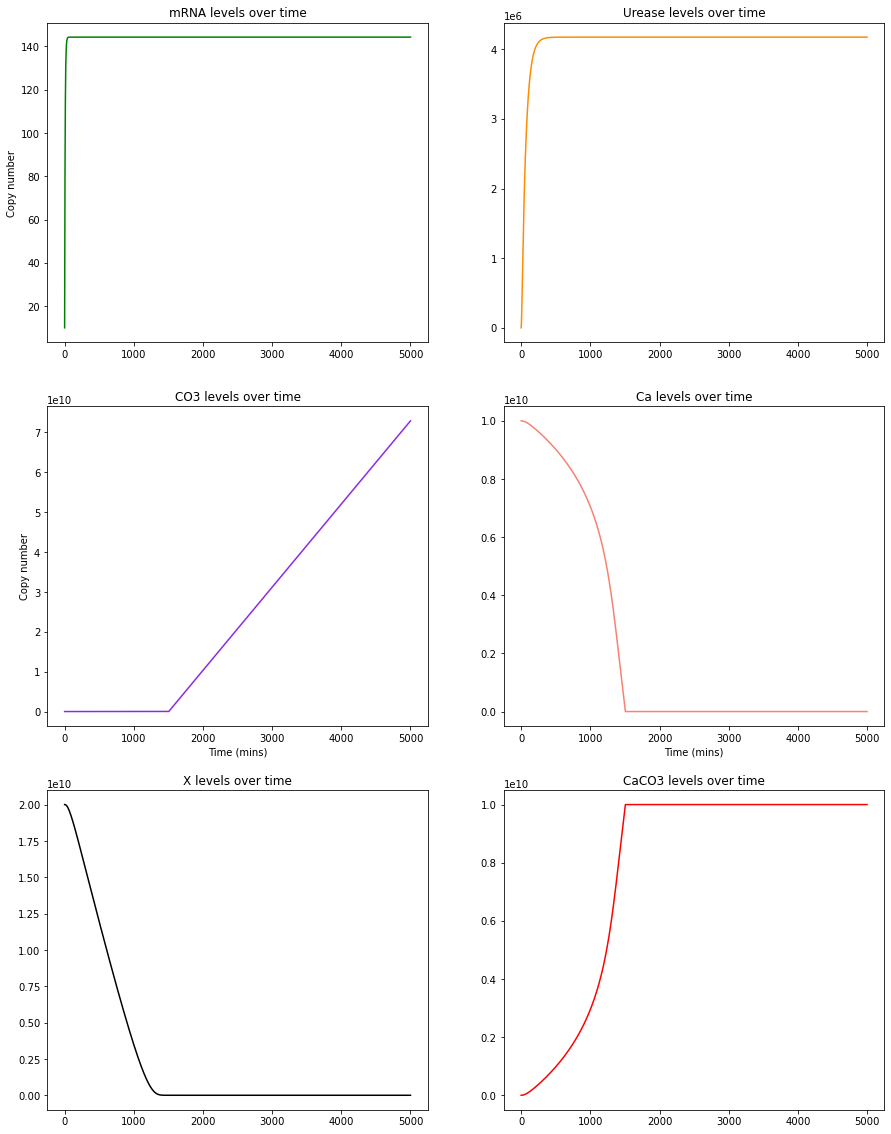

In [11]:
M_obs = s_obs[:,0]
P_obs = s_obs[:,1]
CO3_obs = s_obs[:,2]
Ca_obs = s_obs[:,3]
X_obs = s_obs[:,4]
CaCO3_obs = s_obs[:,5]

fig1 = plt.figure(figsize=(15,20))
axes1 = fig1.add_subplot(3,2,1)
axes2 = fig1.add_subplot(3,2,2)
axes3 = fig1.add_subplot(3,2,3)
axes4 = fig1.add_subplot(3,2,4)
axes5 = fig1.add_subplot(3,2,5)
axes6 = fig1.add_subplot(3,2,6)

axes1.plot(t_obs, M_obs, 'g-', label='mRNA')
axes2.plot(t_obs, P_obs, color ='darkorange', label='Urease copies')
axes3.plot(t_obs, CO3_obs, color='blueviolet', label='Number of CO3  molecules')
axes4.plot(t_obs, Ca_obs, color='salmon', label='Number of Ca  molecules')
axes5.plot(t_obs, X_obs, 'k-', label='Number of X molecules')
axes6.plot(t_obs, CaCO3_obs, 'r-', label='Number of CaCO3  molecules')


axes1.set_title('mRNA levels over time')
axes2.set_title('Urease levels over time')
axes3.set_title('CO3 levels over time')
axes4.set_title('Ca levels over time')
axes5.set_title('X levels over time')
axes6.set_title('CaCO3 levels over time')

axes3.set_xlabel('Time (mins)')
axes4.set_xlabel('Time (mins)')
axes1.set_ylabel('Copy number')
axes3.set_ylabel('Copy number');

Explanation of the graphs:

* **mRNA:** Expect to see a peak early on and it stabilise because transcription is continuously active. It finds a steady state. If we were to consider that the promoter turns on and off, then we would expect to see fluctuations on the mRNA copy number.

* **Protein (Urease):** The peak in the protein copy number happens a bit later than the mRNA, which is to be expected because the protein can only build up if the mRNA has built up. Again, steady state is reached because mRNA also reaches a plateau. The protein copy number will be higher than the mRNA because a single copy of mRNA can be translated more than once. (The scale up won't be correct cause the numbers are made up)

* **CO3:** Won't build up at first becase it's being used up by Ca and X to make Caco3 or XCO3. Once all the Ca and X have been used up, CO3 will build up. 

* **Ca**: Is used up until there's no more left. It doesn't get replaced.

* **X**: It's used up faster than Ca cause the kxco that I set is higher (made it up) and once it gets used up that's it because it isn't replaced.

* **Caco3:** Grows until Ca runs out and then no more CaCO3 can be made. Assumed that it isn't broken down so it just stays at that level. 

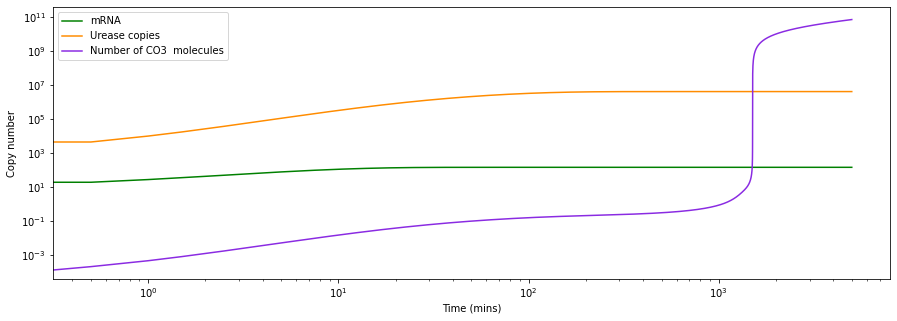

In [13]:
fig1 = plt.figure(figsize=(15,5))
axes1 = fig1.add_subplot(1,1,1)


axes1.loglog(t_obs, M_obs, 'g-', label='mRNA')
axes1.loglog(t_obs, P_obs, color='darkorange', label='Urease copies')
axes1.loglog(t_obs, CO3_obs, color='blueviolet', label='Number of CO3  molecules')
#axes1.plot(t_obs, CaCO3_obs, 'r-', label='Number of CaCO3  molecules')


axes1.set_xlabel('Time (mins)')
axes1.set_ylabel('Copy number')
axes1.legend();

Can see changes to scale. Can see that there's a slight CO3 build-up even while Ca and X are binding to it.